In [1]:
import torch
import numpy as np
import seaborn as sns; sns.set()
path = "final_RAMS_model/" # path to model
model = torch.load("{}/weights.th".format(path), map_location="cpu")

In [3]:
role_preds = model["_role_embeddings"]
cpu_emb = role_preds.cpu()
print (cpu_emb.shape) # Expect torch.Size([66, 50])
norm_values = torch.norm(cpu_emb, dim=1).unsqueeze(0)

# cpu_emb.shape has torch.Size([66, 50])

torch.Size([66, 50])


In [5]:
normalized = cpu_emb.t() / norm_values
print(normalized.shape)

torch.Size([50, 66])


In [6]:
torch.mean(cpu_emb, dim=0)

tensor([ 0.2562,  0.2329, -0.2955, -0.2331, -0.0413, -0.1860,  0.2801, -0.1610,
         0.0924, -0.2378,  0.3694, -0.2239, -0.3320,  0.0992,  0.1511, -0.2372,
        -0.4423, -0.1033,  0.1283, -0.3972, -0.1276,  0.2726, -0.2019, -0.2386,
        -0.3004,  0.2019,  0.1546,  0.1382, -0.2642,  0.2020, -0.3209, -0.2554,
         0.3005,  0.2695, -0.3490, -0.2223,  0.1198,  0.3585, -0.1216,  0.1619,
         0.3345, -0.1624, -0.4256, -0.2225,  0.2772, -0.2703,  0.1163,  0.1218,
         0.2575, -0.2222])

In [8]:
# I don't actually know how to get the font to look right.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib.font_manager as fm
# prop = fm.FontProperties(fname='~/times.ttf')
# font = {'family' : 'times',
#         'weight' : 'normal',
#         'size'   : 14}
# plt.rc('font', prop)
import os

from matplotlib import font_manager as fm, rcParams
fpath = os.path.join(rcParams["datapath"], "~/times.ttf")
fprop = fm.FontProperties(fname=fpath)

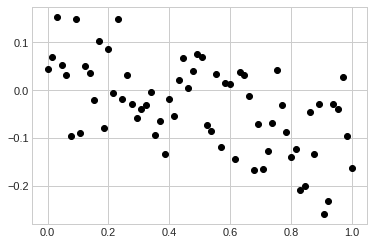

In [9]:
x = np.linspace(0, 1, cpu_emb.shape[0])
y = torch.mean(cpu_emb, dim=1).numpy()

plt.plot(x, y, 'o', color='black');

In [10]:
SRL_LABELS = """ARG1
ARG0
ARG2
ARGM-TMP
ARGM-DIS
ARGM-MOD
ARGM-ADV
ARGM-MNR
ARGM-LOC
ARGM-NEG
R-ARG0
R-ARG1
C-ARG1
ARG3
ARGM-DIR
ARG4
ARGM-PRP
ARGM-CAU
ARGM-PRD
ARGM-ADJ
ARGM-EXT
ARGM-GOL
ARGM-PNC
ARGM-LVB
R-ARGM-LOC
R-ARG2
R-ARGM-TMP
ARGM-COM
C-ARG2
C-ARG0
ARGM-REC
C-ARGM-TMP
R-ARGM-MNR
C-ARGM-ADV
ARG5
R-ARG3
R-ARGM-CAU
C-ARGM-PRP
C-ARGM-MNR
C-ARGM-CAU
C-ARG4
C-ARGM-LOC
C-ARG3
R-ARGM-ADV
ARGA
R-ARGM-DIR
C-ARGM-PRD
ARGM-PRR
ARGM-PRX
R-ARG4
C-ARGM-EXT
R-ARGM-PRP
C-ARGM-DIR
R-ARGM-GOL
R-ARGM-EXT
C-ARGM-ADJ
C-ARGM-DSP
R-ARGM-COM
C-ARGM-PNC
R-ARGM-DIS
ARGM-DSP
C-ARGM-DIS
R-ARGM-PNC
C-ARGM-NEG
C-ARGM-COM
R-ARGM-MOD""".split("\n")

GVDB_LABELS = """DAT-CITY
VIC-AGE
DAT-LOC
VIC-NAME
VIC-RACE
DAT-CLOCK
DAT-TIME
CIR-NUM-SHOTS
SHO-NAME
SHO-AGE
CIR-WEAPON
SHO-RACE""".split("\n")

RAMS_LABELS = "place,recipient,participant,communicator,artifact,victim,giver,target,beneficiary,attacker,instrument,transporter,origin,destination,defendant,preventer,passenger,crime,employee,injurer,placeofemployment,killer,money,detainee,prosecutor,judgecourt,vehicle,jailer,manufacturer,candidate,inspectedentity,investigator,inspector,governmentbody,observedentity,law,otherparticipant,damager,voter,damagerdestroyer,fireexplosionobject,destroyer,violator,extraditer,deceased,artifactmoney,demonstrator,executioner,spy,observer,rejecternullifier,granter,territoryorfacility,gpe,yielder,crashobject,founder,driverpassenger,ballot,surrenderer,hidingplace,retreater,monitoredentity,monitor,result".split(",")

labels = RAMS_LABELS
print (len(labels))

65


In [11]:
RAMS_CORE = {'place': 0, 'recipient': 1, 'participant': 2, 'communicator': 3, 'artifact': 4, 'victim': 5, 'giver': 6, 'target': 7, 'attacker': 8, 'beneficiary': 9, 'instrument': 10, 'transporter': 11, 'origin': 12, 'destination': 13, 'defendant': 14, 'preventer': 15, 'passenger': 16, 'crime': 17, 'injurer': 18, 'employee': 19, 'placeofemployment': 20, 'killer': 21, 'money': 22, 'detainee': 23, 'prosecutor': 24, 'judgecourt': 25, 'vehicle': 26, 'jailer': 27, 'manufacturer': 28, 'candidate': 29, 'inspectedentity': 30, 'investigator': 31, 'governmentbody': 32, 'inspector': 33, 'observedentity': 34, 'otherparticipant': 35, 'law': 36, 'damager': 37, 'voter': 38, 'damagerdestroyer': 39, 'fireexplosionobject': 40, 'destroyer': 41, 'violator': 42, 'extraditer': 43, 'deceased': 44, 'artifactmoney': 45, 'demonstrator': 46, 'executioner': 47, 'spy': 48, 'observer': 49, 'rejecternullifier': 50, 'granter': 51, 'territoryorfacility': 52, 'gpe': 53, 'yielder': 54, 'crashobject': 55, 'founder': 56, 'driverpassenger': 57, 'ballot': 58, 'surrenderer': 59, 'retreater': 60, 'hidingplace': 61, 'monitoredentity': 62, 'monitor': 63, 'result': 64}
label_perm = [-1 for _ in labels]
label_count = dict({k:i for i, k in enumerate(labels)})
for label, idx in RAMS_CORE.items():
    if (labels[idx] == label):
        label_perm[idx] = idx
    else:
        label_perm[idx] = label_count[label]
print (label_perm)

[0, 1, 2, 3, 4, 5, 6, 7, 9, 8, 10, 11, 12, 13, 14, 15, 16, 17, 19, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 32, 34, 36, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 61, 60, 62, 63, 64]


In [12]:
import itertools
role_embs = list(zip(labels, normalized))
# gvdb permutation
# perm = [3, 1, 4, 8, 9, 11, 0, 2, 6, 5, 10, 7] 
perm = list(range(len(labels)))
new_labels = np.asarray(labels)[label_perm]
new_normalized = normalized[:, perm]
values = new_normalized.t().matmul(new_normalized).numpy()
new_role_embs = list(zip(new_labels, new_normalized))
print (new_labels, values)


['place' 'recipient' 'participant' 'communicator' 'artifact' 'victim'
 'giver' 'target' 'attacker' 'beneficiary' 'instrument' 'transporter'
 'origin' 'destination' 'defendant' 'preventer' 'passenger' 'crime'
 'injurer' 'employee' 'placeofemployment' 'killer' 'money' 'detainee'
 'prosecutor' 'judgecourt' 'vehicle' 'jailer' 'manufacturer' 'candidate'
 'inspectedentity' 'investigator' 'governmentbody' 'inspector'
 'observedentity' 'otherparticipant' 'law' 'damager' 'voter'
 'damagerdestroyer' 'fireexplosionobject' 'destroyer' 'violator'
 'extraditer' 'deceased' 'artifactmoney' 'demonstrator' 'executioner'
 'spy' 'observer' 'rejecternullifier' 'granter' 'territoryorfacility'
 'gpe' 'yielder' 'crashobject' 'founder' 'driverpassenger' 'ballot'
 'surrenderer' 'retreater' 'hidingplace' 'monitoredentity' 'monitor'
 'result'] [[ 1.          0.22665824  0.12161961 ... -0.49105957 -0.39551127
  -0.31054437]
 [ 0.22665824  0.9999998   0.2898431  ... -0.28542528 -0.30058405
  -0.17520255]
 [ 0.12161

In [13]:
# paste output directly here 
BERT_DEV_NO_TC_CAMERA_READY = """,place,recipient,communicator,giver,participant,victim,artifact,beneficiary,attacker,target,instrument,preventer,destination,defendant,origin,transporter,crime,employee,money,injurer,placeofemployment,killer,passenger,manufacturer,spy,judgecourt,artifactmoney,investigator,destroyer,yielder,vehicle,observedentity,prosecutor,voter,territoryorfacility,governmentbody,candidate,inspectedentity,surrenderer,inspector,damager,damagerdestroyer,law,jailer,fireexplosionobject,monitoredentity,granter,crashobject,driverpassenger,violator,otherparticipant,retreater,demonstrator,monitor,deceased,founder,executioner,result,detainee,gpe,extraditer
place,89,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
recipient,0,74,5,11,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
communicator,0,0,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
giver,7,15,0,71,0,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
participant,4,2,0,4,87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
victim,0,0,0,0,0,95,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
artifact,1,6,0,1,0,0,83,1,0,0,2,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
beneficiary,2,6,0,7,0,0,2,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
attacker,0,0,0,0,0,2,0,0,87,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
target,8,0,0,0,0,7,0,0,16,65,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
instrument,0,0,0,0,0,0,2,0,2,7,80,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
preventer,4,2,0,0,0,0,0,0,0,0,0,88,0,0,0,2,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
destination,8,0,0,0,0,0,0,0,0,0,0,0,73,0,13,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
defendant,0,0,0,0,0,0,0,0,0,0,0,0,0,90,0,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
origin,16,0,0,0,0,0,0,0,0,0,0,0,6,0,69,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
transporter,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,87,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
crime,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
employee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
money,0,36,0,3,0,0,16,0,0,0,0,3,0,0,0,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
injurer,0,0,0,0,0,24,0,0,6,0,6,0,0,0,0,6,0,0,0,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
placeofemployment,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,96,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
killer,8,0,0,0,0,12,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
passenger,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,4,4,0,0,0,0,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
manufacturer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
spy,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
judgecourt,20,0,0,0,0,0,0,0,0,0,0,0,0,20,0,0,10,0,0,0,0,10,0,0,0,20,0,0,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
artifactmoney,10,40,0,20,0,0,10,0,0,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
investigator,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
destroyer,11,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
yielder,37,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
vehicle,0,0,0,0,0,0,25,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
observedentity,12,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
prosecutor,12,0,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
voter,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,14,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
territoryorfacility,42,28,0,14,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
governmentbody,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
candidate,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
inspectedentity,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
surrenderer,33,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
inspector,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
damager,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
damagerdestroyer,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
law,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
jailer,0,0,0,0,0,0,0,0,0,0,0,50,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fireexplosionobject,0,0,0,0,0,0,0,0,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
monitoredentity,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,33,0,0,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
granter,0,0,0,0,0,0,0,0,0,0,0,0,0,0,66,33,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
crashobject,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0,0,0,0,0
driverpassenger,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,50,0,0,0,0,0,0,0,0,0,0,0,0
violator,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0
otherparticipant,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0
retreater,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,0,0,0,0,0,0,0,0
demonstrator,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0
monitor,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
deceased,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0
founder,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,0,0,0,50,0
executioner,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
result,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
detainee,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
gpe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,0,0,0,0,0
extraditer,100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0"""
raw_array = [line.split(",") for line in BERT_DEV_NO_TC_CAMERA_READY.split("\n")]
cm_labels = raw_array[0][1:]

# remap confusion matrix labels
row_col_dict = {k: dict() for k in cm_labels}
for r, line in enumerate(raw_array[1:]):
    for c, val in enumerate(line[1:]):
        row_col_dict[cm_labels[r]][cm_labels[c]] = val
    
new_cm_labels = [label for label in new_labels if label in cm_labels]
output_matrix = [[int(row_col_dict[row][col]) / 100.0 for col in new_cm_labels ] for row in new_cm_labels]
cm_labels = new_cm_labels

bert_dev_table = np.asarray(output_matrix)
# labels are same as before
print (len(cm_labels), cm_labels, bert_dev_table.shape)
print(bert_dev_table)

61 ['place', 'recipient', 'participant', 'communicator', 'artifact', 'victim', 'giver', 'target', 'attacker', 'beneficiary', 'instrument', 'transporter', 'origin', 'destination', 'defendant', 'preventer', 'passenger', 'crime', 'injurer', 'employee', 'placeofemployment', 'killer', 'money', 'detainee', 'prosecutor', 'judgecourt', 'vehicle', 'jailer', 'manufacturer', 'candidate', 'inspectedentity', 'investigator', 'governmentbody', 'inspector', 'observedentity', 'otherparticipant', 'law', 'damager', 'voter', 'damagerdestroyer', 'fireexplosionobject', 'destroyer', 'violator', 'extraditer', 'deceased', 'artifactmoney', 'demonstrator', 'executioner', 'spy', 'granter', 'territoryorfacility', 'gpe', 'yielder', 'crashobject', 'founder', 'driverpassenger', 'surrenderer', 'retreater', 'monitoredentity', 'monitor', 'result'] (61, 61)
[[0.89 0.02 0.01 ... 0.   0.   0.  ]
 [0.   0.74 0.   ... 0.   0.   0.  ]
 [0.04 0.02 0.87 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0

In [14]:
import sklearn

In [15]:
import matplotlib.pyplot as plt
font = {'family' : 'sans-serif',
         'weight' : 'normal',
         'size'   : 132}
# font = {}
plt.rc('text', usetex=False)
plt.rc('font', **font)

def plot_confusion_matrix(cm, classes, title='Role Embedding Similarity', 
                          cmap=plt.cm.RdBu, vmin=-1, vmax=1,
                          ylabel='Role', xlabel='Role', img_size=4):
    fig, ax = plt.subplots(dpi=600)
    print (img_size)
    fig.set_size_inches(img_size, img_size)
    im = ax.imshow(cm, interpolation='none', cmap=cmap,vmin=vmin, vmax=vmax)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=[c[:3] for c in classes], yticklabels=[c[:] for c in classes],
           # title=title,
           ylabel=ylabel,
           xlabel=xlabel)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top') 
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=90)
    plt.grid(b=None)

    return ax

4
['place' 'recipient' 'participant' 'communicator' 'artifact' 'victim'
 'giver' 'target' 'attacker' 'beneficiary' 'instrument' 'transporter'
 'origin' 'destination' 'defendant' 'preventer' 'passenger' 'crime'
 'injurer' 'employee' 'placeofemployment' 'killer' 'money' 'detainee'
 'prosecutor' 'judgecourt' 'vehicle' 'jailer' 'manufacturer' 'candidate'
 'inspectedentity' 'investigator' 'governmentbody' 'inspector'
 'observedentity' 'otherparticipant' 'law' 'damager' 'voter'
 'damagerdestroyer' 'fireexplosionobject' 'destroyer' 'violator'
 'extraditer' 'deceased' 'artifactmoney' 'demonstrator' 'executioner'
 'spy' 'observer' 'rejecternullifier' 'granter' 'territoryorfacility'
 'gpe' 'yielder' 'crashobject' 'founder' 'driverpassenger' 'ballot'
 'surrenderer' 'retreater' 'hidingplace' 'monitoredentity' 'monitor'
 'result']


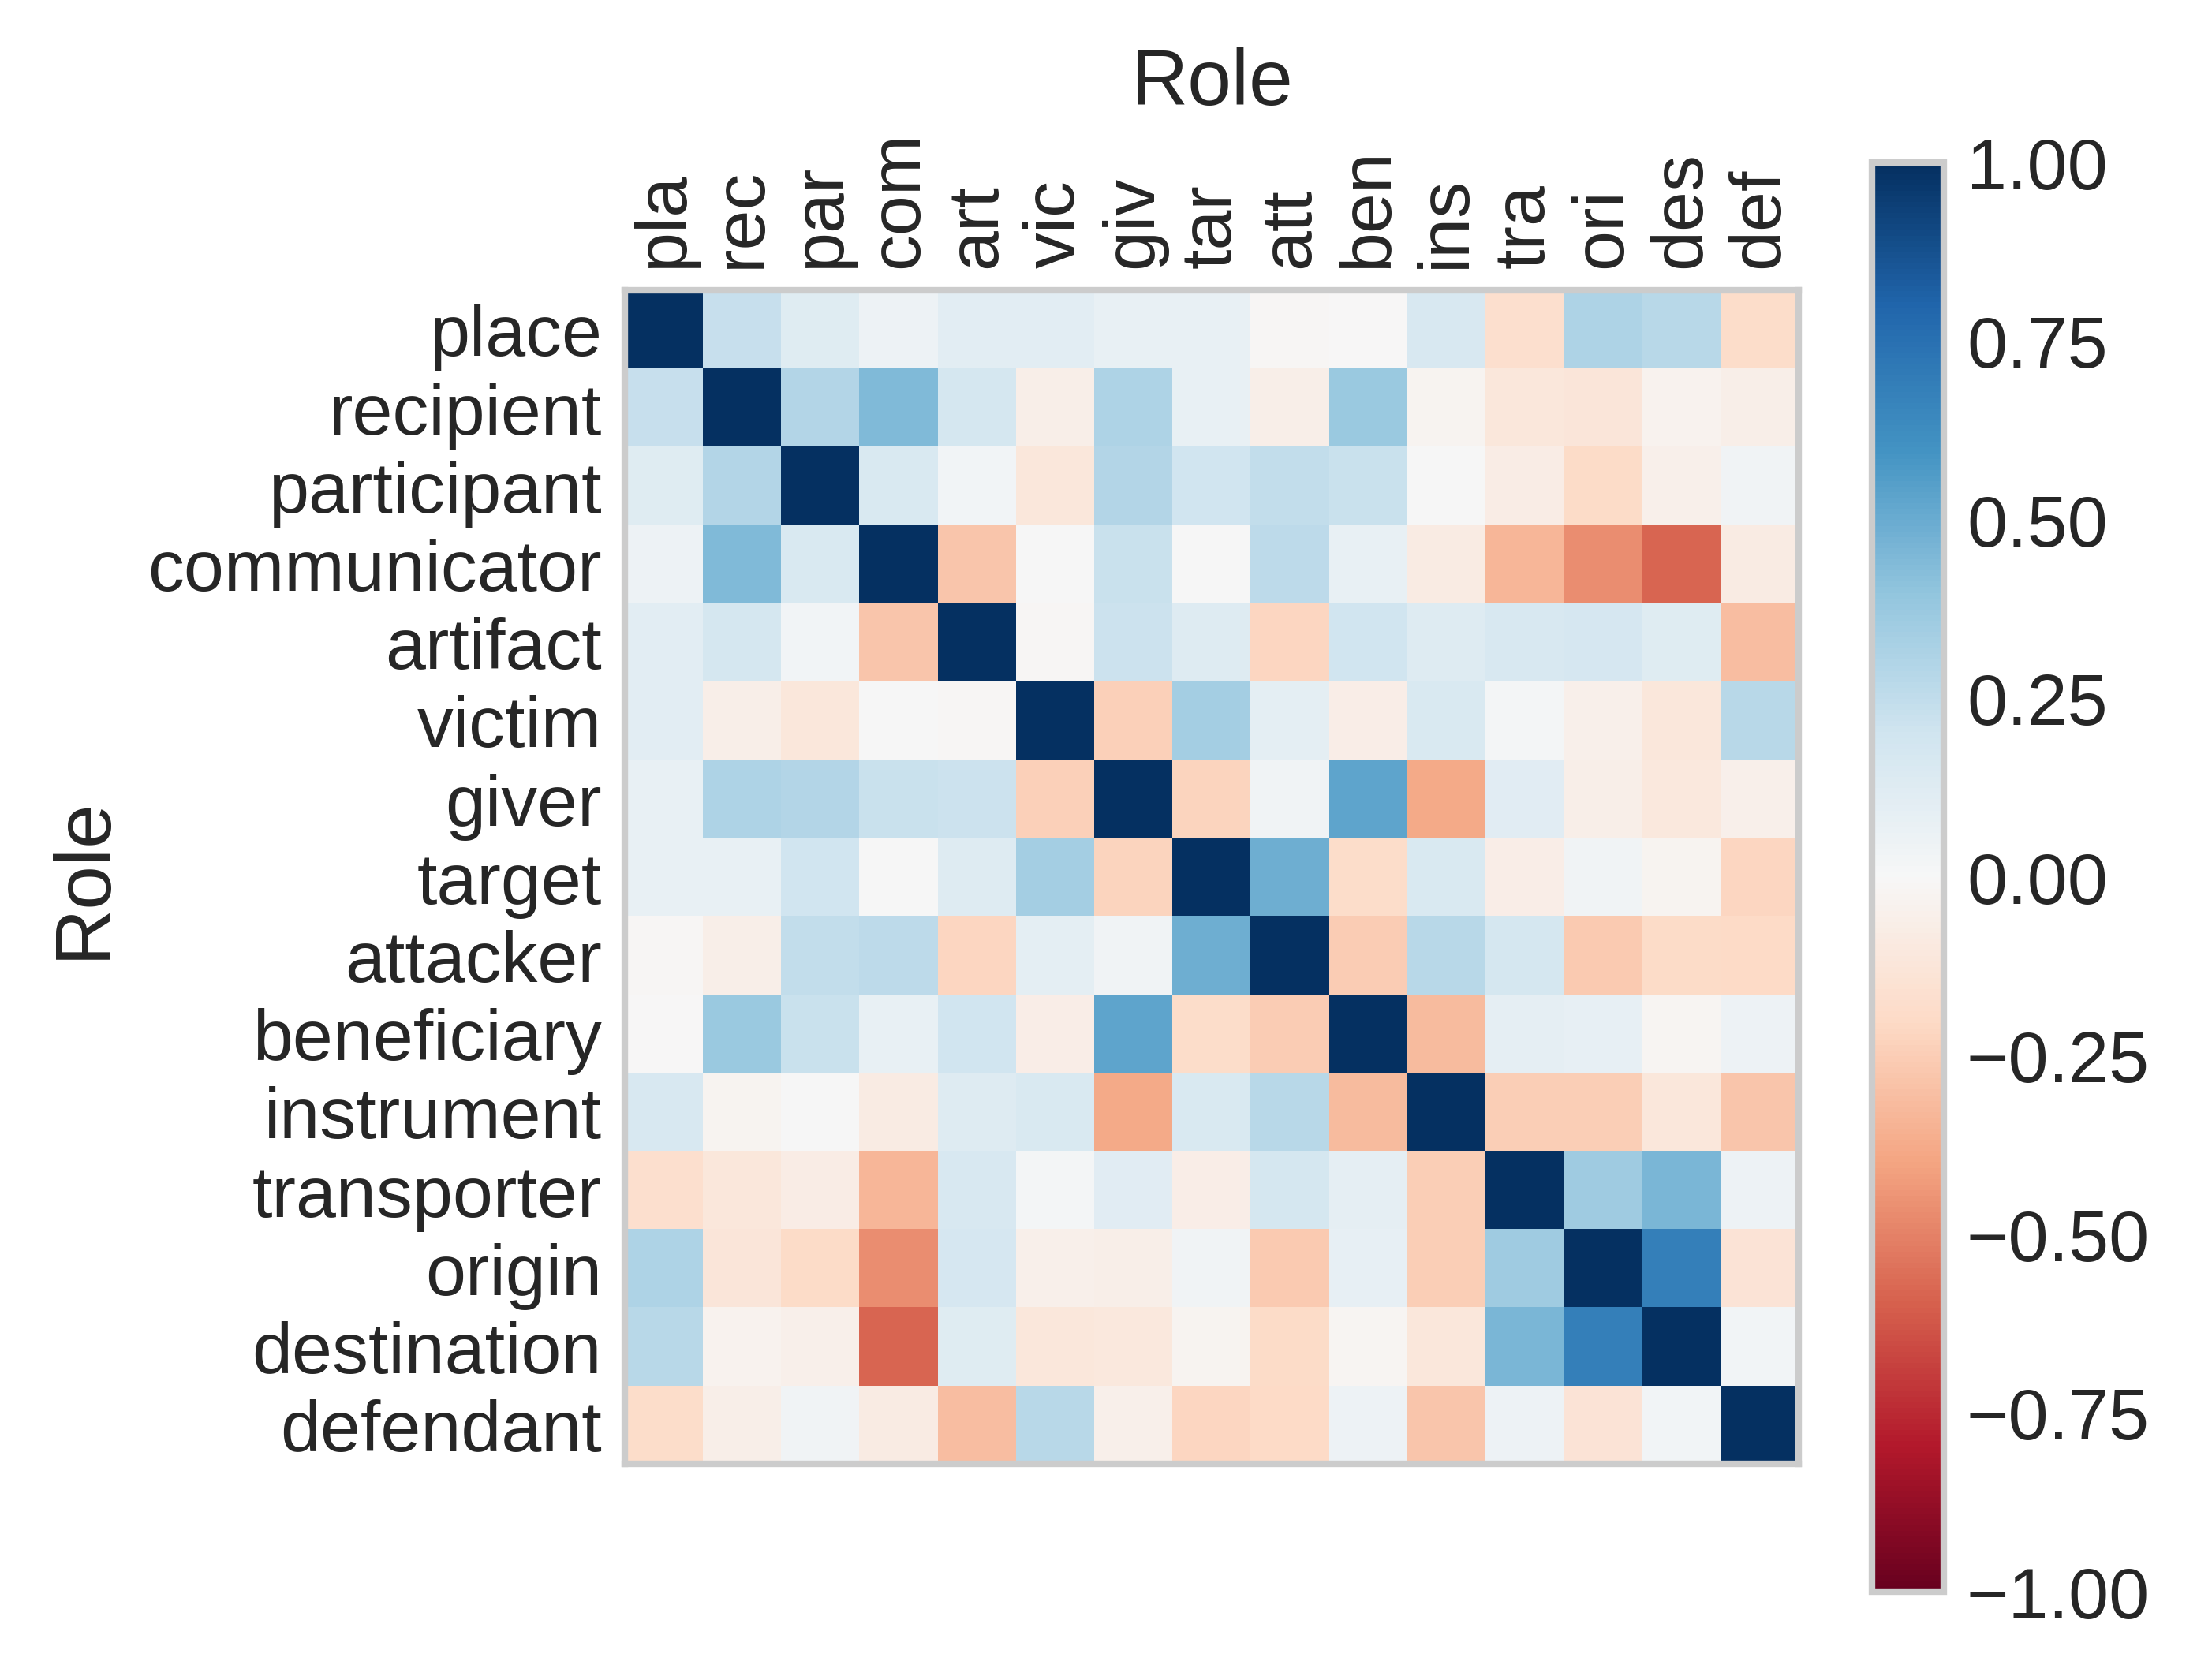

In [16]:
n = 15 # Change n if we want the full one
size = 16 if n > 20 else 4
plot_confusion_matrix(values[:n, :n], new_labels[:n], img_size=size)

# Change location of saved figure
plt.savefig("arglink_embeddings_{}.png".format(n), scale=20, bbox_inches="tight")
print (new_labels)

4
['place', 'recipient', 'participant', 'communicator', 'artifact', 'victim', 'giver', 'target', 'attacker', 'beneficiary', 'instrument', 'transporter', 'origin', 'destination', 'defendant', 'preventer', 'passenger', 'crime', 'injurer', 'employee', 'placeofemployment', 'killer', 'money', 'detainee', 'prosecutor', 'judgecourt', 'vehicle', 'jailer', 'manufacturer', 'candidate', 'inspectedentity', 'investigator', 'governmentbody', 'inspector', 'observedentity', 'otherparticipant', 'law', 'damager', 'voter', 'damagerdestroyer', 'fireexplosionobject', 'destroyer', 'violator', 'extraditer', 'deceased', 'artifactmoney', 'demonstrator', 'executioner', 'spy', 'granter', 'territoryorfacility', 'gpe', 'yielder', 'crashobject', 'founder', 'driverpassenger', 'surrenderer', 'retreater', 'monitoredentity', 'monitor', 'result']


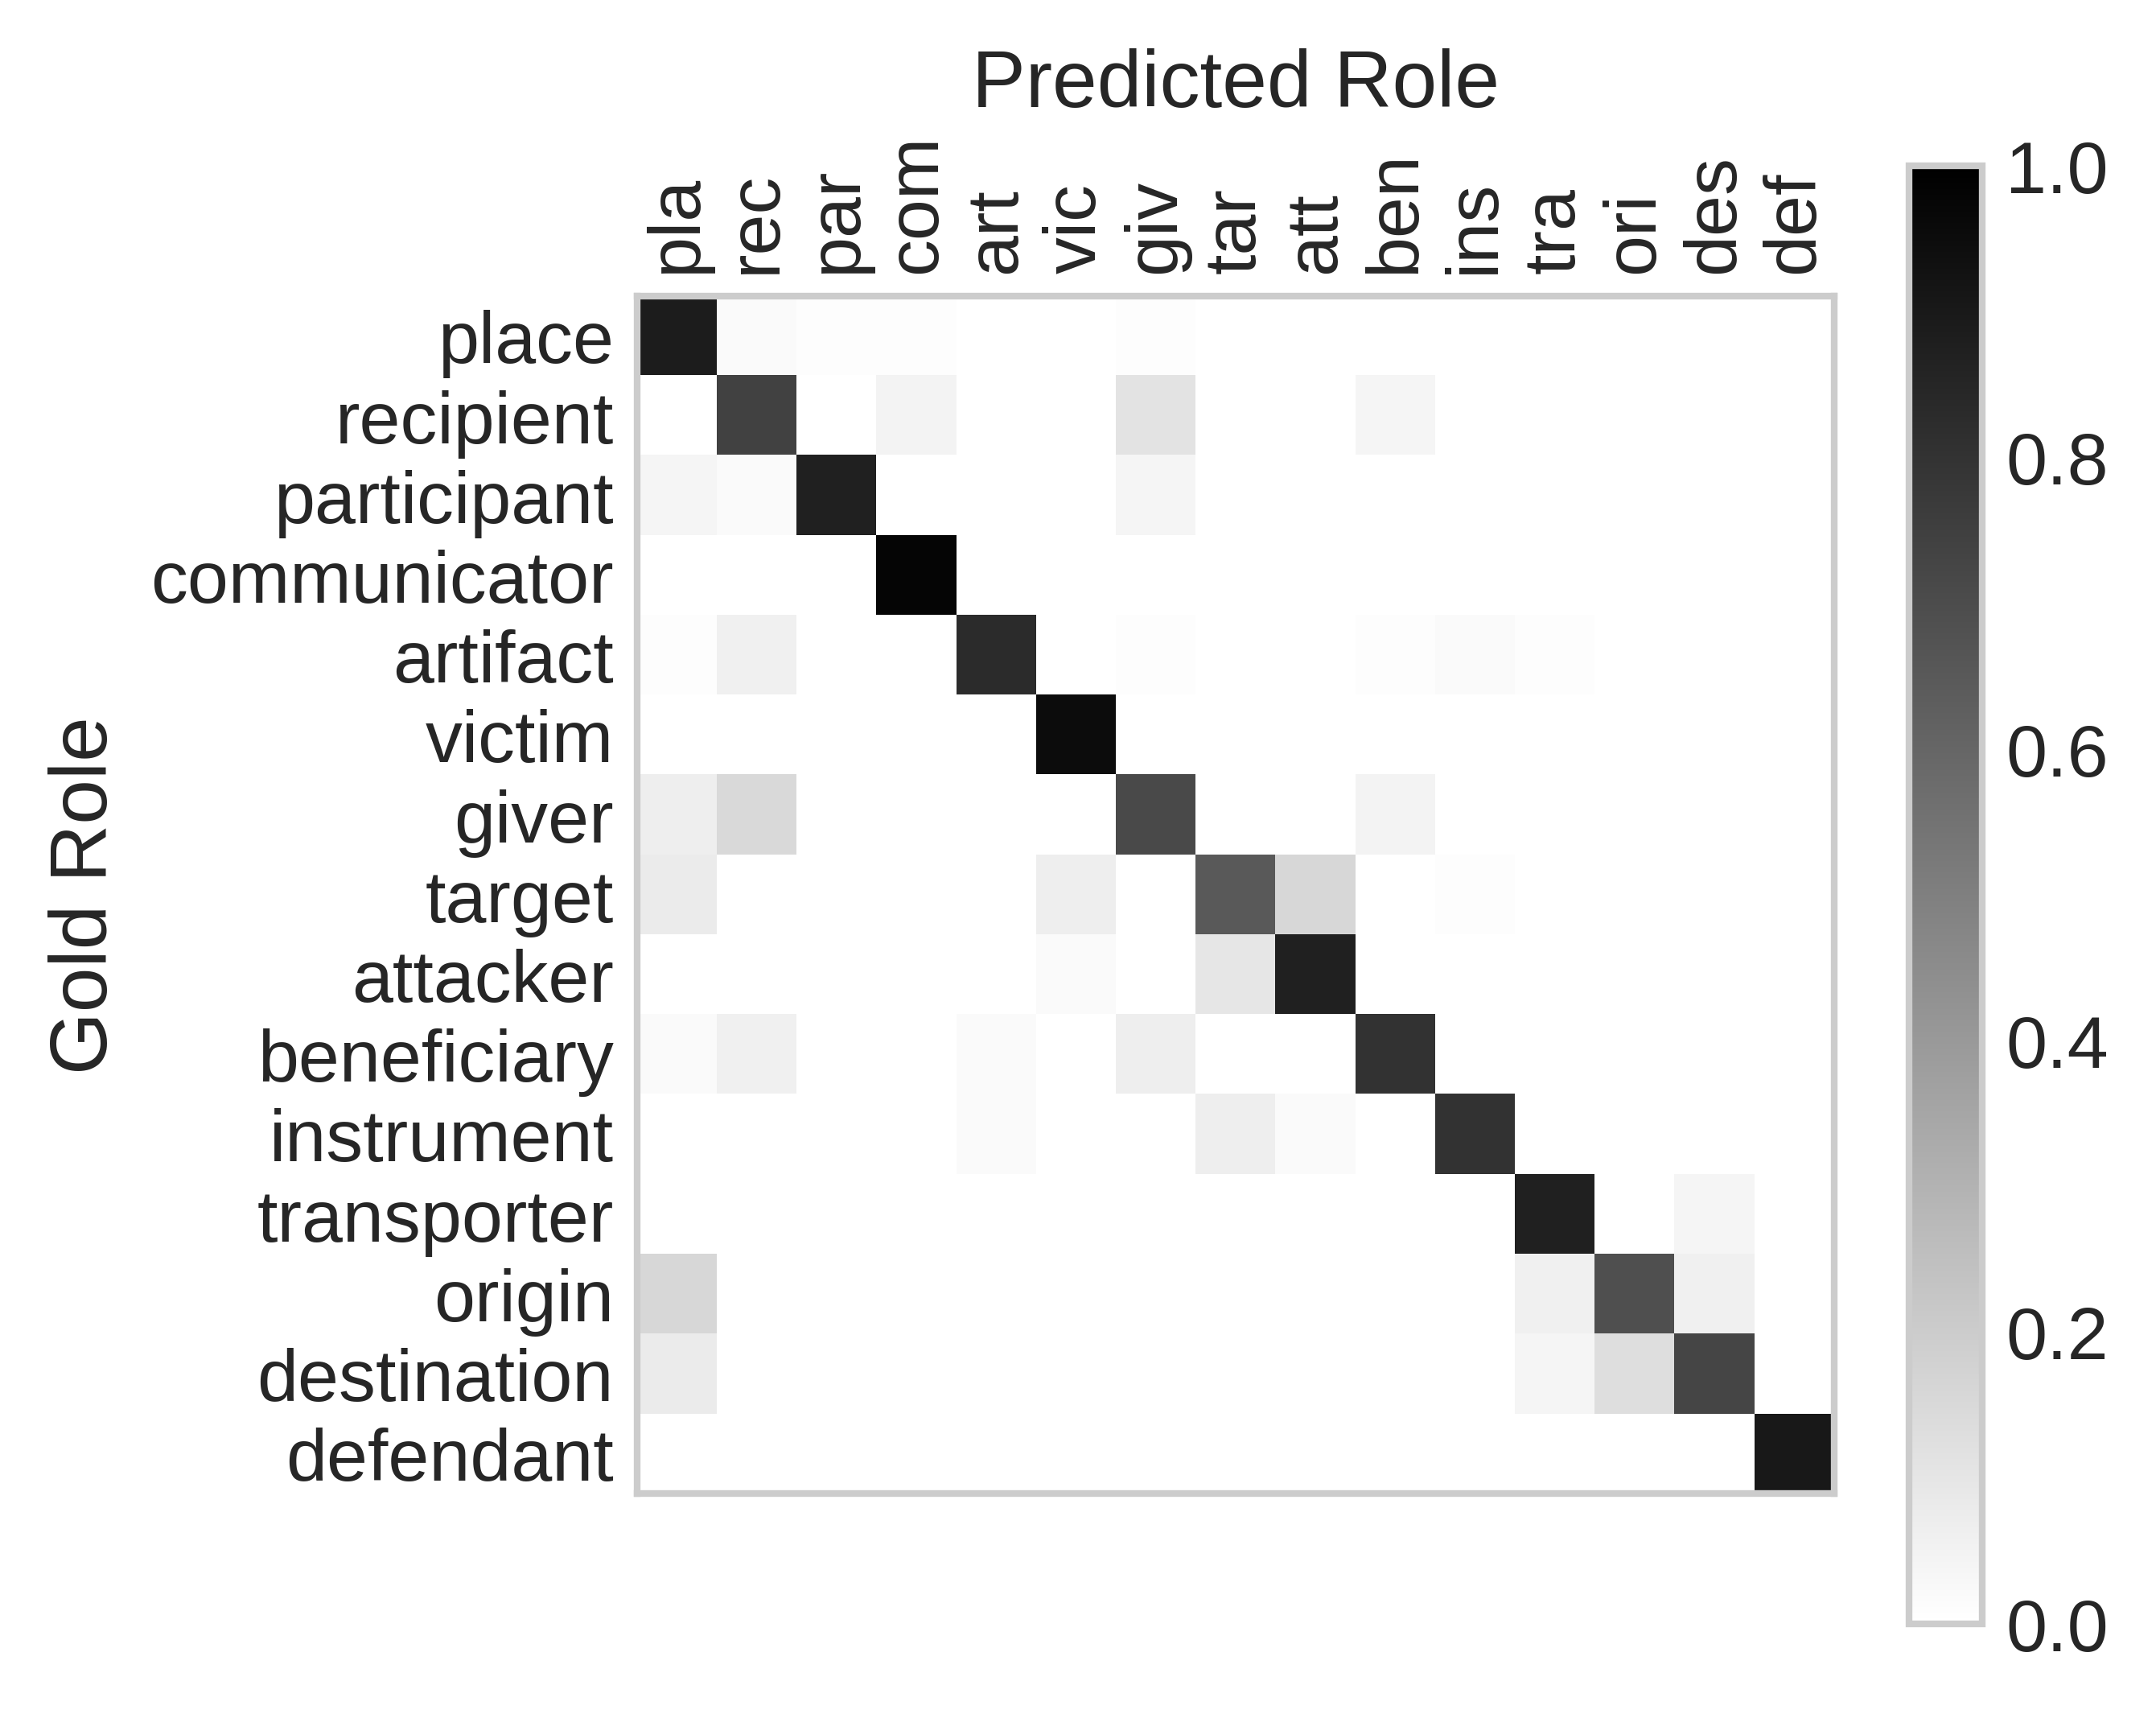

In [17]:
n = 15
size = 16 if n > 20 else 4
bert_dev_table_n = bert_dev_table[:n, :n]
cm_labels_n = cm_labels[:n]

plot_confusion_matrix(bert_dev_table_n, cm_labels_n, title="Normalized Confusion", 
                      cmap=plt.cm.binary, vmin=0, vmax=1, ylabel="Gold Role", xlabel="Predicted Role", img_size=size)

# Change location of saved figure
plt.savefig("arglink_confusion_{}.png".format(n), scale=20, bbox_inches="tight")
print (cm_labels)